In [7]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [8]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [9]:
NUM_CLASSES = 8

# Dataset reading

In [10]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [13]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [18]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
37/37 [==============================] - 2s 17ms/step - loss: 2.0565 - accuracy: 0.1639 - val_loss: 1.9441 - val_accuracy: 0.2610

Epoch 00001: saving model to model\keypoint_classifier.hdf5
Epoch 2/1000
37/37 [==============================] - 0s 12ms/step - loss: 1.8806 - accuracy: 0.2818 - val_loss: 1.7626 - val_accuracy: 0.2913

Epoch 00002: saving model to model\keypoint_classifier.hdf5
Epoch 3/1000
37/37 [==============================] - 0s 4ms/step - loss: 1.7168 - accuracy: 0.3346 - val_loss: 1.5601 - val_accuracy: 0.4173

Epoch 00003: saving model to model\keypoint_classifier.hdf5
Epoch 4/1000
37/37 [==============================] - 0s 4ms/step - loss: 1.5739 - accuracy: 0.3802 - val_loss: 1.3920 - val_accuracy: 0.4890

Epoch 00004: saving model to model\keypoint_classifier.hdf5
Epoch 5/1000
37/37 [==============================] - 0s 4ms/step - loss: 1.4711 - accuracy: 0.4237 - val_loss: 1.2697 - val_accuracy: 0.5045

Epoch 00005: saving model to model\keypoint

Epoch 41/1000
37/37 [==============================] - 0s 4ms/step - loss: 0.8069 - accuracy: 0.6866 - val_loss: 0.4388 - val_accuracy: 0.9160

Epoch 00041: saving model to model\keypoint_classifier.hdf5
Epoch 42/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.6913 - val_loss: 0.4317 - val_accuracy: 0.9089

Epoch 00042: saving model to model\keypoint_classifier.hdf5
Epoch 43/1000
37/37 [==============================] - 0s 13ms/step - loss: 0.7848 - accuracy: 0.6986 - val_loss: 0.4209 - val_accuracy: 0.9212

Epoch 00043: saving model to model\keypoint_classifier.hdf5
Epoch 44/1000
37/37 [==============================] - 0s 5ms/step - loss: 0.7836 - accuracy: 0.7001 - val_loss: 0.4146 - val_accuracy: 0.9089

Epoch 00044: saving model to model\keypoint_classifier.hdf5
Epoch 45/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.7863 - accuracy: 0.6965 - val_loss: 0.4171 - val_accuracy: 0.9031

Epoch 00045: saving model to model\keyp

37/37 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.7413 - val_loss: 0.3297 - val_accuracy: 0.9457

Epoch 00081: saving model to model\keypoint_classifier.hdf5
Epoch 82/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.7363 - val_loss: 0.3225 - val_accuracy: 0.9451

Epoch 00082: saving model to model\keypoint_classifier.hdf5
Epoch 83/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.7391 - val_loss: 0.3123 - val_accuracy: 0.9483

Epoch 00083: saving model to model\keypoint_classifier.hdf5
Epoch 84/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.7454 - val_loss: 0.3212 - val_accuracy: 0.9528

Epoch 00084: saving model to model\keypoint_classifier.hdf5
Epoch 85/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.7417 - val_loss: 0.3146 - val_accuracy: 0.9535

Epoch 00085: saving model to model\keypoint_classifier

37/37 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.7464 - val_loss: 0.2780 - val_accuracy: 0.9587

Epoch 00121: saving model to model\keypoint_classifier.hdf5
Epoch 122/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.7480 - val_loss: 0.2839 - val_accuracy: 0.9528

Epoch 00122: saving model to model\keypoint_classifier.hdf5
Epoch 123/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.7574 - val_loss: 0.2842 - val_accuracy: 0.9509

Epoch 00123: saving model to model\keypoint_classifier.hdf5
Epoch 124/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.7617 - val_loss: 0.2797 - val_accuracy: 0.9496

Epoch 00124: saving model to model\keypoint_classifier.hdf5
Epoch 125/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.7561 - val_loss: 0.2860 - val_accuracy: 0.9522

Epoch 00125: saving model to model\keypoint_classi

37/37 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.7566 - val_loss: 0.2691 - val_accuracy: 0.9496

Epoch 00161: saving model to model\keypoint_classifier.hdf5
Epoch 162/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.7736 - val_loss: 0.2765 - val_accuracy: 0.9503

Epoch 00162: saving model to model\keypoint_classifier.hdf5
Epoch 163/1000
37/37 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.7635 - val_loss: 0.2780 - val_accuracy: 0.9561

Epoch 00163: saving model to model\keypoint_classifier.hdf5
Epoch 164/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.7600 - val_loss: 0.2823 - val_accuracy: 0.9574

Epoch 00164: saving model to model\keypoint_classifier.hdf5
Epoch 165/1000
37/37 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.7645 - val_loss: 0.2729 - val_accuracy: 0.9632

Epoch 00165: saving model to model\keypoint_classi

Epoch 201/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.7650 - val_loss: 0.2649 - val_accuracy: 0.9516

Epoch 00201: saving model to model\keypoint_classifier.hdf5
Epoch 202/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.7658 - val_loss: 0.2841 - val_accuracy: 0.9425

Epoch 00202: saving model to model\keypoint_classifier.hdf5
Epoch 203/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.7617 - val_loss: 0.2681 - val_accuracy: 0.9535

Epoch 00203: saving model to model\keypoint_classifier.hdf5
Epoch 204/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.7615 - val_loss: 0.2652 - val_accuracy: 0.9528

Epoch 00204: saving model to model\keypoint_classifier.hdf5
Epoch 205/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.7807 - val_loss: 0.2660 - val_accuracy: 0.9574

Epoch 00205: saving model to model\

In [20]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.9528


In [21]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [22]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.2850673e-01 3.5676621e-02 3.2193329e-02 3.5375012e-03 4.8310238e-05
 1.8884880e-06 3.5460802e-05 1.8697742e-07]
0


# Confusion matrix

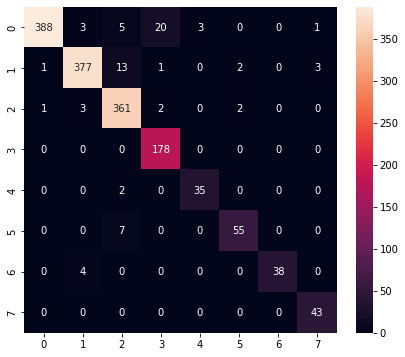

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       420
           1       0.97      0.95      0.96       397
           2       0.93      0.98      0.95       369
           3       0.89      1.00      0.94       178
           4       0.92      0.95      0.93        37
           5       0.93      0.89      0.91        62
           6       1.00      0.90      0.95        42
           7       0.91      1.00      0.96        43

    accuracy                           0.95      1548
   macro avg       0.94      0.95      0.95      1548
weighted avg       0.96      0.95      0.95      1548



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [24]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [25]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp_3idyvma\assets


6528

# Inference test

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.99 ms


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2850661e-01 3.5676654e-02 3.2193348e-02 3.5375007e-03 4.8310318e-05
 1.8884912e-06 3.5460933e-05 1.8697754e-07]
0
